In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 400)

In [3]:
import matplotlib.pyplot as plt
import psycopg2

# results already evaluated for all available lenses, so just loading results
sql_query = """SELECT * FROM results"""
con = psycopg2.connect(database='results_db', user='ana', host='localhost', password='nonsense')
results = pd.read_sql_query(sql_query,con)

sql_query = """SELECT * FROM sales_clean"""
con = psycopg2.connect(database='sales_db', user='ana', host='localhost', password='nonsense')
sales = pd.read_sql_query(sql_query,con)

In [12]:
sort_res = results.sort_values(by=['resale_price'])

In [13]:
sort_res.shape

(311, 23)

In [14]:
sort_res.reset_index(drop=True)

,index,lens_id,brand,original_price,announce_date,format,flen_min,flen_max,image_stabilization,f_min,...,maximum_magnification,autofocus,weight,sealing,image_href,resale_price,wildlife_score,portraits_score,low_light_score,landscape_score
0,7,olympus_m_40-150_4-5p6_r,olympus,103.60,2011,1.00,40.0,150.0,False,4.0,...,0.16,True,190,False,https://4.img-dpreview.com/files/p/TS375x375~products/oly_m_40-150_4-5p6_r/316538d25c25483ebde2d5f38ae10318.png,50.00,0.0,0.0,0.0,0.0
1,199,nikon_af-p_18-55_3p5-5p6_vr,nikon,246.95,2016,1.33,18.0,55.0,True,3.5,...,0.38,True,205,False,https://2.img-dpreview.com/files/p/TS375x375~products/nikon_af-p_18-55_3p5-5p6_vr/shots/3889740ba54a40909ce41147dd78dc8a.png,55.00,0.0,0.0,13.0,1.0
2,22,olympus_m_14-42_3p5-5p6_ez,olympus,228.60,2014,1.00,14.0,42.0,False,3.5,...,0.23,True,91,False,https://3.img-dpreview.com/files/p/TS375x375~products/olympus_m_14-42_3p5-5p6_ez/shots/b1b50cd8d9c945349a5d18fb54c8c85e.png,55.00,0.0,0.0,1.0,1.0
3,308,canon_18-55_3p5-5p6_is_stm,canon,113.99,2013,1.33,18.0,55.0,True,3.5,...,0.36,True,205,False,https://4.img-dpreview.com/files/p/TS375x375~products/canon_18-55_3p5-5p6_is_stm/shots/74925baf70aa473baf860aaae3af547d.png,55.00,0.0,0.0,0.0,0.0
4,270,tamron_18-200_3p5-6p3_di_ii_vc,tamron,191.85,2015,1.33,18.0,200.0,True,3.5,...,-1.00,True,400,True,https://4.img-dpreview.com/files/p/TS375x375~products/tamron_18-200_3p5-6p3_di_ii_vc/shots/98b39fde1eae41529dfddc34c898fcd9png,55.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,82,panasonic_s_pro_50_1p4,panasonic,2297.99,2019,2.00,50.0,-1.0,False,1.4,...,0.15,True,955,True,https://1.img-dpreview.com/files/p/TS375x375~products/panasonic_s_pro_50_1p4/shots/5676a86e47be471ba37f30818c100670.png,1815.00,0.0,0.0,0.0,0.0
307,280,panasonic_s_pro_70-200_2p8,panasonic,2597.99,2019,2.00,70.0,200.0,True,2.8,...,0.21,True,1570,True,https://1.img-dpreview.com/files/p/TS375x375~products/panasonic_s_pro_70-200_2p8/shots/cdbc40917e5f4eb48925463056de50ea.png,1847.50,0.0,0.0,0.0,0.0
308,20,panasonic_s_pro_24-70_2p8,panasonic,2197.99,2019,2.00,24.0,70.0,False,2.8,...,0.25,True,935,True,https://4.img-dpreview.com/files/p/TS375x375~products/panasonic_s_pro_24-70_2p8/shots/2476b2b1bc084b4a8afe487534e6b03b.png,1847.50,0.0,0.0,0.0,0.0
309,298,canon_rf_15-35_2p8l_is_usm,canon,2299.00,2019,2.00,15.0,35.0,True,2.8,...,0.21,True,840,True,https://2.img-dpreview.com/files/p/TS375x375~products/canon_rf_15-35_2p8l_is_usm/shots/952b0c750d6b4689b643592bfa235067.png,1929.80,0.0,0.0,2.0,1.0


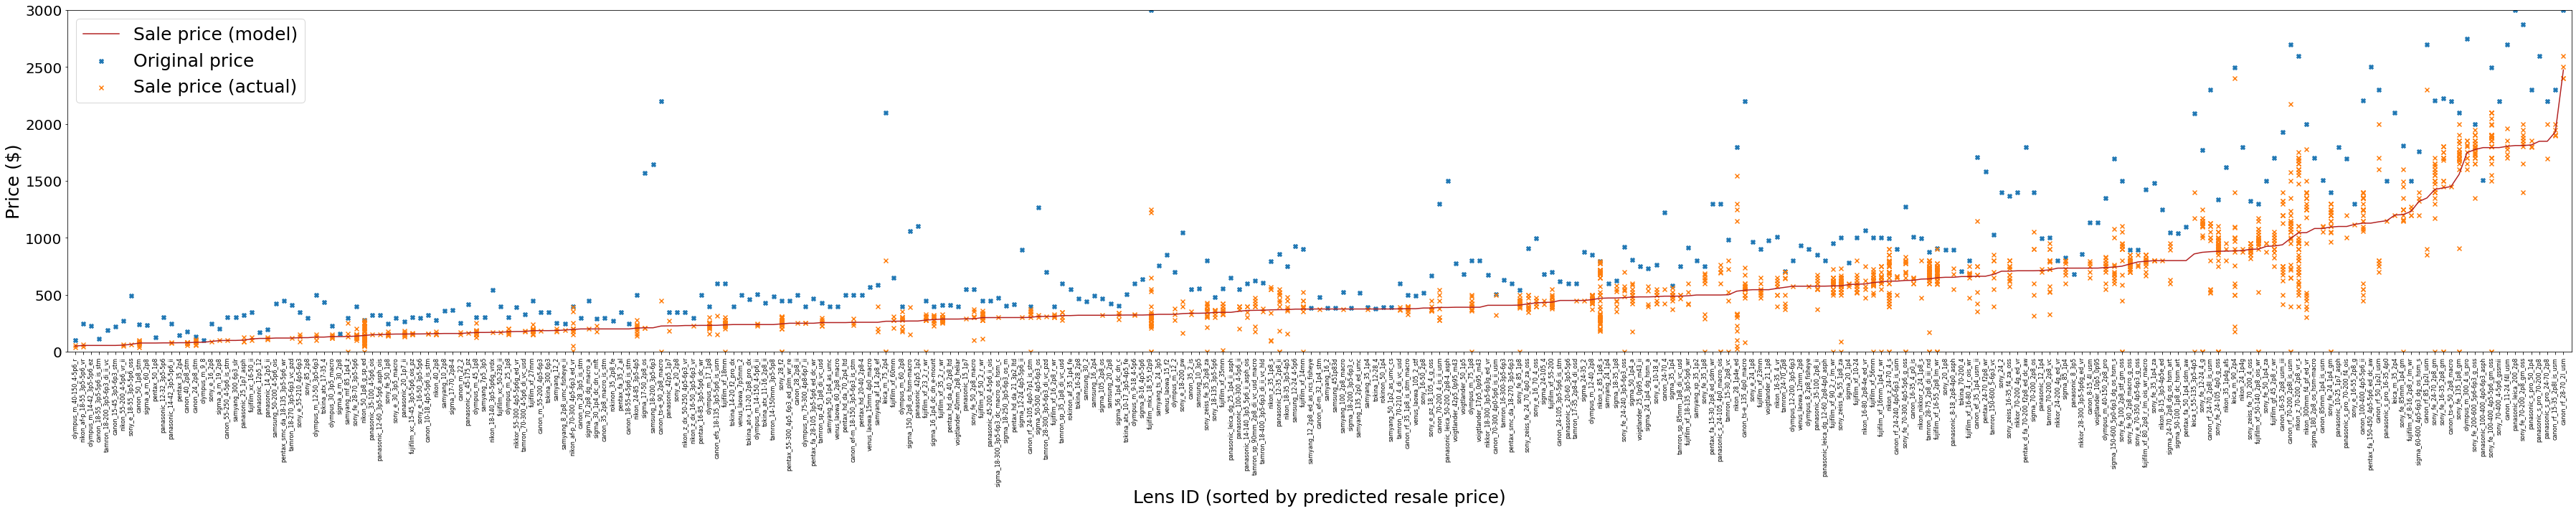

In [37]:
fig, ax = plt.subplots(figsize=[50,10])

    
ax.plot(sort_res['lens_id'], 
         sort_res['resale_price'], 
#          marker='o',
         alpha=1,
         color='firebrick',
         label="Sale price (model)")

ax.scatter(sort_res['lens_id'], 
         sort_res['original_price'], 
         marker='X',
         alpha=1,
         label="Original price")

ax.scatter(sales['lens_id'], 
         sales['price'], 
         marker='x',
         alpha=1,
         label="Sale price (actual)")

fsize = 25

# fig.gca().grid(True, linewidth=0.7, linestyle=':')
ax.set_xlim(-1,311)
ax.set_ylim(0,3000)
ax.tick_params(axis='x', rotation=90, labelsize=8)
ax.tick_params(axis='y', labelsize=20)

ax.set_xlabel('Lens ID (sorted by predicted resale price)',fontsize=fsize)
ax.set_ylabel('Price ($)', fontsize=fsize)

ax.legend(loc='upper left', fontsize=fsize)
fig.tight_layout()
fig.savefig('resale_price_model.jpeg');